[파이썬에서 선형회귀(Linear regression)를 이용한 게 나이 예측하기](https://github.com/boringariel/scikit-learn/blob/c9e0f4853c83c582ddee974ed2f00b133e1250fa/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(Linear%20regression)%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EA%B2%8C%20%EB%82%98%EC%9D%B4%20%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb#L4)

패키지 및 데이터 불러오기

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

reg = LinearRegression()

crab = pd.read_csv('data/CrabAgePrediction.csv')

In [7]:
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [8]:
y = crab['Age']

In [9]:
x = crab['Length']

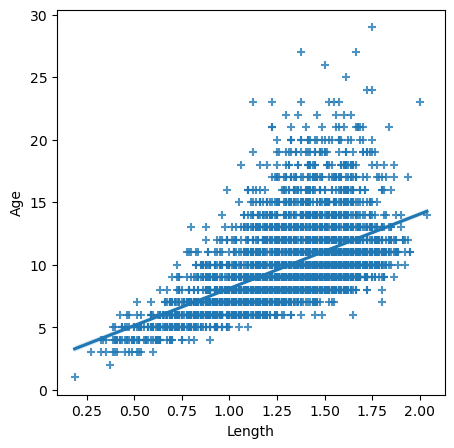

In [10]:
plt.figure(figsize=(5,5))
sns.regression.regplot(
    data=crab,
    x=x,
    y=y,
    marker='+'
)

plt.show()

Regression

In [11]:
x.values.shape

(3893,)

In [12]:
x.values.reshape(-1,1)

array([[1.4375],
       [0.8875],
       [1.0375],
       ...,
       [0.625 ],
       [1.0625],
       [0.7875]])

In [13]:
reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [14]:
# 양의 상관관계
reg.coef_

array([5.94996062])

In [15]:
reg.predict([[3]])

array([20.00245614])

(남자/여자) (나이/길이) 선형 회귀

남자 여자 데이터 분리

In [16]:
male_data = crab[crab['Sex'] == 'M']
female_data = crab[crab['Sex'] == 'F']

남자 데이터로 선형 회귀 분석

In [17]:
X_male = male_data[['Length']].values
y_male = male_data['Age'].values
model_male  = LinearRegression()
model_male.fit(X_male,y_male)

LinearRegression()

여자 데이터로 선형 회귀 분석

In [18]:
X_female = female_data[['Length']].values
y_female = female_data['Age'].values
model_female  = LinearRegression()
model_female.fit(X_female,y_female)

LinearRegression()

남자 여자 회귀 계수와 절편

In [19]:
male_coef, male_intercept = model_male.coef_[0], model_male.intercept_
female_coef, female_intercept = model_female.coef_[0], model_female.intercept_

male_coef, male_intercept, female_coef, female_intercept

(4.313023800150826, 4.668092465664555, 3.161155130254655, 6.564239122596113)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [23]:
x_poly = poly.fit_transform(x.values.reshape(-1,1))

In [24]:
reg = LinearRegression()
reg.fit(x_poly, y)

LinearRegression()

In [25]:
reg.coef_

array([11.6275777 , -2.33926167])